In [3]:
# importing the necessary libraries
import pandas as pd                   # data science essentials
import matplotlib.pyplot as plt       # essential graphical output
import seaborn as sns                 # enhanced graphical output
import numpy as np                    # mathematical essentials
import statsmodels.formula.api as smf # regression modeling 
from sklearn.model_selection import train_test_split  # train/test split
from sklearn.linear_model import LinearRegression    # linear regression (scikit-learn)


# specifying the file name
file = './Apprentice_Chef_Dataset.xlsx'

# reading the file and renaming it as "apprentice"
apprentice = pd.read_excel(file)

In [4]:
# Renaming LARGEST_ORDER_SIZE, since it is mislabeled and represents the 
# average number of meals ordered per customer
apprentice.rename(columns={"LARGEST_ORDER_SIZE" : "AVG_MEALS_ORDERED"}, inplace = True)

# checking the information about each variable to see data types
apprentice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [5]:
# checking the first 5 observation to determine the type of variable
apprentice.head(5)


##  CONTINUOUS VARIABLES:
'REVENUE'
'AVG_TIME_PER_SITE_VISIT'
'AVG_PREP_VID_TIME'

## INTERVAL/COUNT
'CROSS_SELL_SUCCESS'
'TOTAL_MEALS_ORDERED'
'UNIQUE_MEALS_PURCH'
'CONTACTS_W_CUSTOMER_SERVICE'
'PRODUCT_CATEGORIES_VIEWED'
'CANCELLATIONS_BEFORE_NOON'
'CANCELLATIONS_AFTER_NOON'
'MOBILE_LOGINS'
'PC_LOGINS'
'WEEKLY_PLAN'
'EARLY_DELIVERIES'
'LATE_DELIVERIES'
'PACKAGE_LOCKER'
'MOBILE_PHONE'
'REFRIGERATED_LOCKER'
'TASTES_AND_PREFERENCES'
'MASTER_CLASSES_ATTENDED'
'TOTAL_PHOTOS_VIEWED'
'AVG_MEALS_ORDERED'
'AVG_CLICKS_PER_VISIT'


## CATEGORICAL
'NAME'
'EMAIL'
'FIRST_NAME'
'FAMILY_NAME'

'FAMILY_NAME'

In [6]:
## EXPLORATORY DATA ANALYSIS ##

# displaying the columns of the dataset
print("""
EXPLORATORY DATA ANALYSIS

Columns of the dataset:\n""", apprentice.columns)

# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {apprentice.shape[0]}
Features:     {apprentice.shape[1]}
""")

# checking descriptive statistics 
print("""
Descriptive statistics per column:\n""", apprentice.describe())

# checking for missing values (if there are any and how many)
apprentice.isnull().any()
print("""
Number of missing values in the dataset:""", apprentice.isnull().sum().sum())

# Comment: since there are missing values only in the "Family Name" variable,
# and the NAs cannot be inferred, we do not make any changes 



EXPLORATORY DATA ANALYSIS

Columns of the dataset:
 Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME',
       'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
       'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED',
       'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON',
       'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS',
       'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES',
       'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME',
       'AVG_MEALS_ORDERED', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING',
       'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED'],
      dtype='object')

Size of Original Dataset
------------------------
Observations: 1946
Features:     28


Descriptive statistics per column:
            REVENUE  CROSS_SELL_SUCCESS  TOTAL_MEALS_ORDERED  \
count  1946.000000         1946.000000          1946.000000   
mean   2107.292652            0.6788

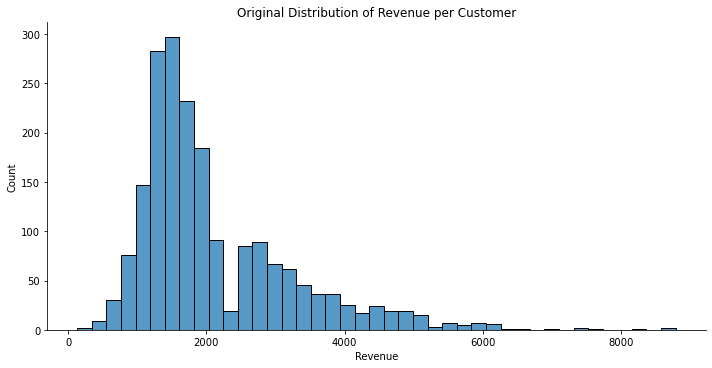

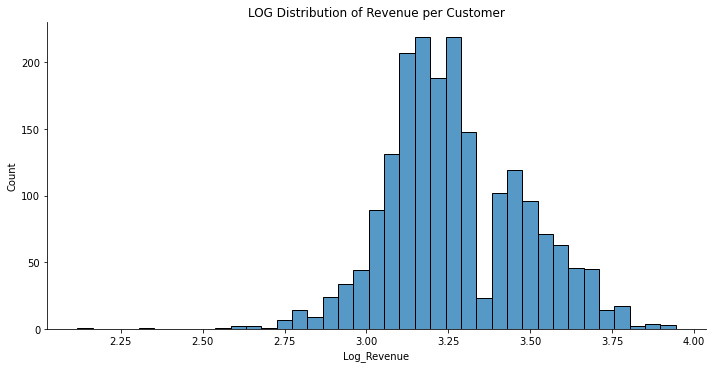

In [7]:
# developing a histogram to check the distribution of the dependent variable: Revenue
sns.displot(data   = apprentice,
            x      = 'REVENUE',
            height = 5,
            aspect = 2)



plt.title(label   = "Original Distribution of Revenue per Customer")
plt.xlabel(xlabel = "Revenue") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# Comment: The data is continuous, positively skewed, and does not appear 
# to be normal. For this reason, we will then use a Logarithmic Transformation
# on Revenue to see if its distribution changes.

# creating a new column in the dataset to store the results of the transformation
apprentice['log_REVENUE'] = np.log10(apprentice['REVENUE'])

# creating an histogram to check the distribution of the transformed variable
sns.displot(data   = apprentice,
            x      = 'log_REVENUE',
            height = 5,
            aspect = 2)



plt.title(label   = "LOG Distribution of Revenue per Customer")
plt.xlabel(xlabel = "Log_Revenue") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# Comment: by applying the log transformation, we can see that the distribution
# of REVENUE becomes approximately normal

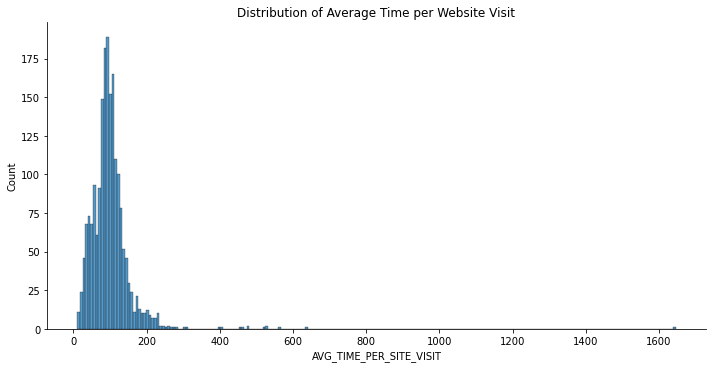

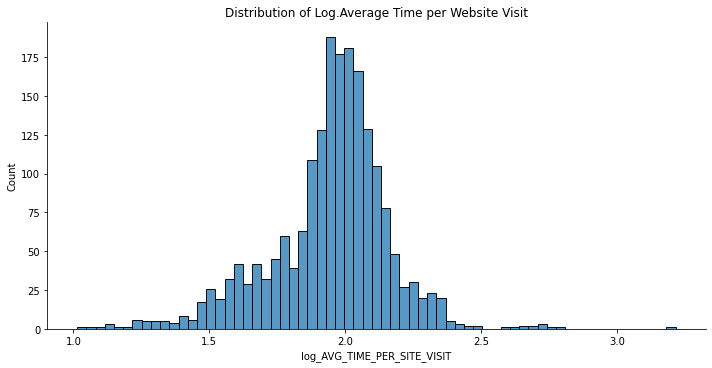

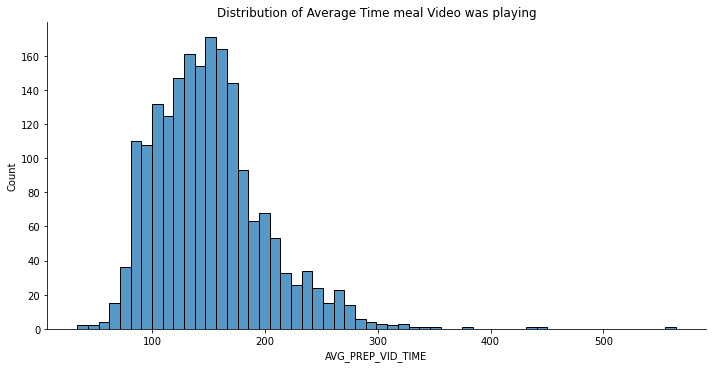

Text(3.674999999999997, 0.5, 'Count')

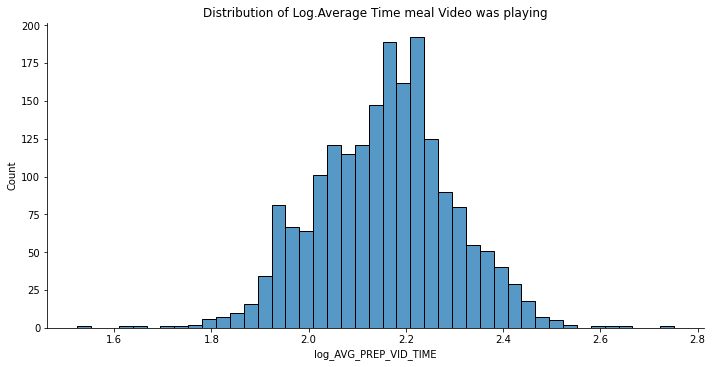

In [8]:
# Check all the X-variables for skewness and use a Log Transformation if necessary

## AVG_TIME_PER_SITE_VISIT
sns.displot(data   = apprentice,
            x      = 'AVG_TIME_PER_SITE_VISIT',
            height = 5,
            aspect = 2)



plt.title(label   = "Distribution of Average Time per Website Visit")
plt.xlabel(xlabel = "AVG_TIME_PER_SITE_VISIT") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# creating a new column in the dataset to store the results of the transformation
apprentice['log_AVG_TIME_PER_SITE_VISIT'] = np.log10(apprentice['AVG_TIME_PER_SITE_VISIT'])

sns.displot(data   = apprentice,
            x      = 'log_AVG_TIME_PER_SITE_VISIT',
            height = 5,
            aspect = 2)



plt.title(label   = "Distribution of Log.Average Time per Website Visit")
plt.xlabel(xlabel = "log_AVG_TIME_PER_SITE_VISIT") 
plt.ylabel(ylabel = "Count")




## AVG_PREP_VID_TIME
sns.displot(data   = apprentice,
            x      = 'AVG_PREP_VID_TIME',
            height = 5,
            aspect = 2)



plt.title(label   = "Distribution of Average Time meal Video was playing")
plt.xlabel(xlabel = "AVG_PREP_VID_TIME") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# creating a new column in the dataset to store the results of the transformation
apprentice['log_AVG_PREP_VID_TIME'] = np.log10(apprentice['AVG_PREP_VID_TIME'])

sns.displot(data   = apprentice,
            x      = 'log_AVG_PREP_VID_TIME',
            height = 5,
            aspect = 2)



plt.title(label   = "Distribution of Log.Average Time meal Video was playing")
plt.xlabel(xlabel = "log_AVG_PREP_VID_TIME") 
plt.ylabel(ylabel = "Count")




In [9]:
## BASE MODELING ##

# creating a list of continuous features to check their correlations, including Y
continuous_data = ['REVENUE', 'AVG_TIME_PER_SITE_VISIT',
                   'AVG_PREP_VID_TIME']

# developing a correlation matrix based on continuous features
apprentice_corr = apprentice[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with Revenue
apprentice_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                    1.00
AVG_PREP_VID_TIME          0.64
AVG_TIME_PER_SITE_VISIT    0.14
Name: REVENUE, dtype: float64

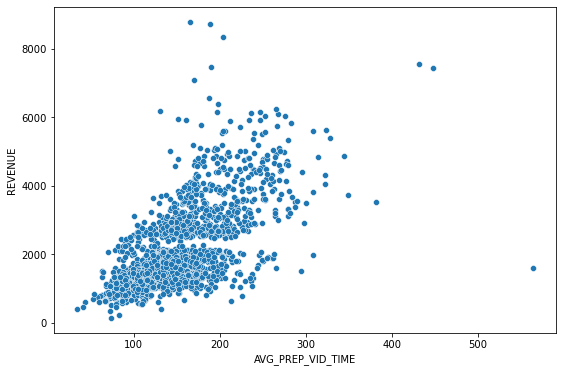

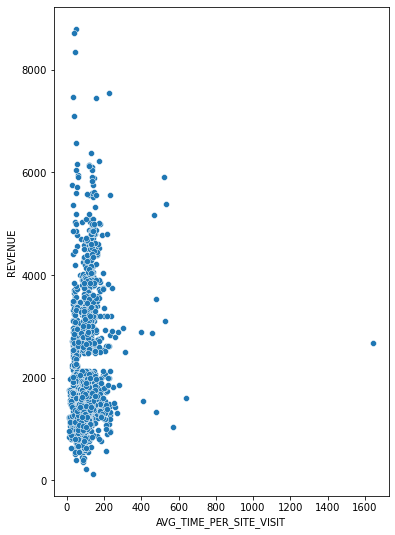

In [10]:
# creating a scatterplot for the variables with the strongest correlation 
# with Revenue to check the OLS assumptions 

# REVENUE vs AVG_PREP_VID_TIME
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = 'AVG_PREP_VID_TIME',
                y    = 'REVENUE',
                data = apprentice)

# Showing results 
plt.show()




# REVENUE vs  AVG_TIME_PER_SITE_VISIT
fig, ax = plt.subplots(figsize = (6, 9))
sns.scatterplot(x    = 'AVG_TIME_PER_SITE_VISIT',
                y    = 'REVENUE',
                data = apprentice)
plt.show()



In [11]:
## OLS MODEL

# Building the OLS regression model, using log_REVENUE as dependent variable
# and ONLY continuous variables
lm_log_revenue = smf.ols("""log_REVENUE ~ log_AVG_TIME_PER_SITE_VISIT + log_AVG_PREP_VID_TIME""",
                         data=apprentice)

results = lm_log_revenue.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     797.3
Date:                Thu, 28 Jan 2021   Prob (F-statistic):          1.51e-253
Time:                        14:51:58   Log-Likelihood:                 842.68
No. Observations:                1946   AIC:                            -1679.
Df Residuals:                    1943   BIC:                            -1663.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

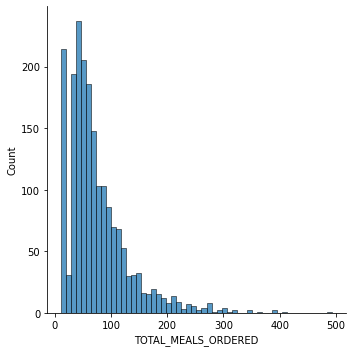

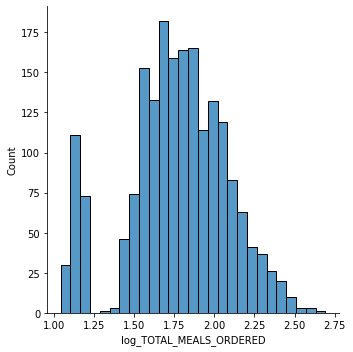

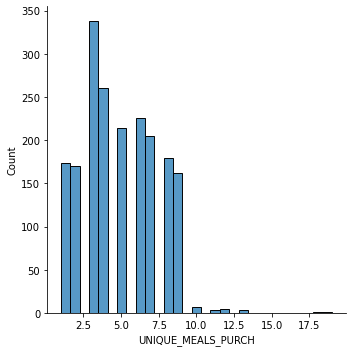

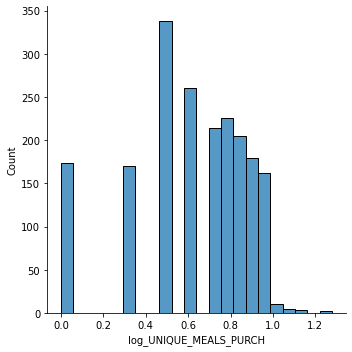

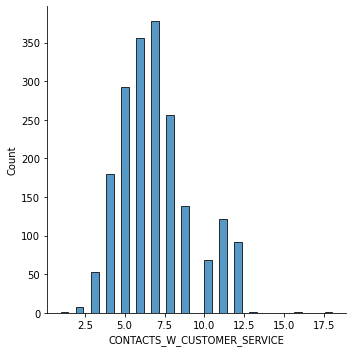

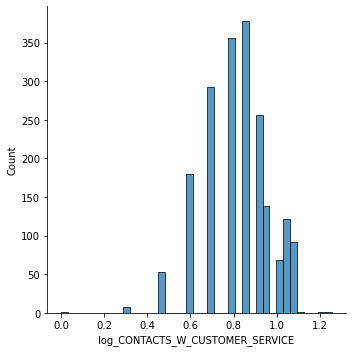

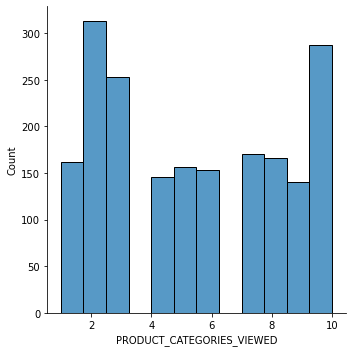

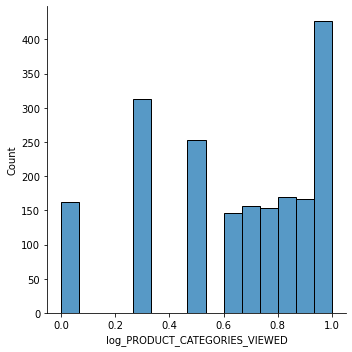

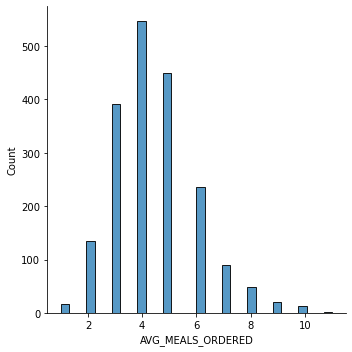

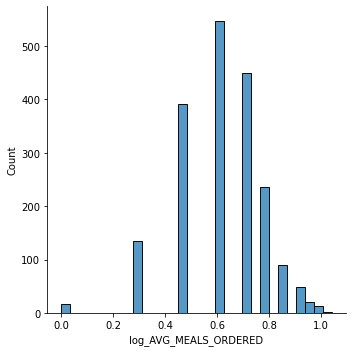

In [12]:
# Applying Log transformations to other variables

# TOTAL_MEALS_ORDERED 
apprentice['log_TOTAL_MEALS_ORDERED'] = np.log10(apprentice['TOTAL_MEALS_ORDERED'])
sns.displot( apprentice , x ="TOTAL_MEALS_ORDERED")
sns.displot( apprentice , x ="log_TOTAL_MEALS_ORDERED")

# UNIQUE_MEALS_PURCH 
apprentice['log_UNIQUE_MEALS_PURCH'] = np.log10(apprentice['UNIQUE_MEALS_PURCH'])
sns.displot( apprentice , x ="UNIQUE_MEALS_PURCH")
sns.displot( apprentice , x ="log_UNIQUE_MEALS_PURCH")

# CONTACTS_W_CUSTOMER_SERVICE 
apprentice['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(apprentice['CONTACTS_W_CUSTOMER_SERVICE'])
sns.displot( apprentice , x ="CONTACTS_W_CUSTOMER_SERVICE")
sns.displot( apprentice , x ="log_CONTACTS_W_CUSTOMER_SERVICE")

# PRODUCT_CATEGORIES_VIEWED 
apprentice['log_PRODUCT_CATEGORIES_VIEWED'] = np.log10(apprentice['PRODUCT_CATEGORIES_VIEWED'])
sns.displot( apprentice , x ="PRODUCT_CATEGORIES_VIEWED")
sns.displot( apprentice , x ="log_PRODUCT_CATEGORIES_VIEWED")

# AVG_MEAL_ORDERED_PER_CUST 
apprentice['log_AVG_MEALS_ORDERED'] = np.log10(apprentice['AVG_MEALS_ORDERED'])
sns.displot( apprentice , x ="AVG_MEALS_ORDERED")
sns.displot( apprentice , x ="log_AVG_MEALS_ORDERED")

apprentice['log_MEDIAN_MEAL_RATING'] = np.log10(apprentice['MEDIAN_MEAL_RATING'])


In [13]:
## Running a OLS MODEL with all of the variables to check the SIGNIFICANT ones

lm_log_revenue = smf.ols(formula = """log_REVENUE ~   log_AVG_TIME_PER_SITE_VISIT +
                                                      log_AVG_PREP_VID_TIME +
                                                      log_TOTAL_MEALS_ORDERED +
                                                      CROSS_SELL_SUCCESS +
                                                      PACKAGE_LOCKER +
                                                      UNIQUE_MEALS_PURCH +
                                                      CONTACTS_W_CUSTOMER_SERVICE +
                                                      PRODUCT_CATEGORIES_VIEWED +
                                                      AVG_MEALS_ORDERED +
                                                      AVG_CLICKS_PER_VISIT +
                                                      CANCELLATIONS_BEFORE_NOON +
                                                      CANCELLATIONS_AFTER_NOON +
                                                      PC_LOGINS +
                                                      MOBILE_LOGINS +
                                                      WEEKLY_PLAN +
                                                      EARLY_DELIVERIES +
                                                      LATE_DELIVERIES +
                                                      MEDIAN_MEAL_RATING +
                                                      REFRIGERATED_LOCKER +
                                                      TASTES_AND_PREFERENCES +
                                                      MASTER_CLASSES_ATTENDED +
                                                      TOTAL_PHOTOS_VIEWED
                                                    
                                                      """,
                         
                         
                         data = apprentice)


# telling Python to FIT the data to the blueprint
results = lm_log_revenue.fit()


# printing a summary of the results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     209.0
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:52:08   Log-Likelihood:                 1447.9
No. Observations:                1946   AIC:                            -2850.
Df Residuals:                    1923   BIC:                            -2722.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [14]:
# Removing the insignificant variables and re-run the OLS regression

lm_log_revenue = smf.ols(formula = """log_REVENUE ~   log_AVG_PREP_VID_TIME +                                                     log_TOTAL_MEALS_ORDERED +
                                                      TOTAL_MEALS_ORDERED +
                                                      log_UNIQUE_MEALS_PURCH +
                                                      
                                                      log_CONTACTS_W_CUSTOMER_SERVICE +
                                                      log_AVG_MEALS_ORDERED +
                                                      CROSS_SELL_SUCCESS+
                                                      MASTER_CLASSES_ATTENDED +
                                                      TOTAL_PHOTOS_VIEWED +
                                                      MEDIAN_MEAL_RATING
                                                      """,
                         
                         
                         data = apprentice)


# telling Python to FIT the data to the blueprint
results = lm_log_revenue.fit()


# printing a summary of the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     515.2
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:52:13   Log-Likelihood:                 1522.7
No. Observations:                1946   AIC:                            -3023.
Df Residuals:                    1935   BIC:                            -2962.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [ ]:
apprentice

In [15]:
# preparing explanatory variable data
apprentice_data = apprentice.drop(['NAME','EMAIL','FIRST_NAME','FAMILY_NAME',
                                  'REVENUE', 'log_REVENUE'],
                                    axis = 1)
# preparing response variable data
apprentice_Y = apprentice['REVENUE']
log_apprentice_Y = apprentice['log_REVENUE']

# creating 2 different splits, one for the normal Y and one for log Y
x_train, x_test, y_train, y_test = train_test_split(
            apprentice_data,
            apprentice_Y,
            test_size = 0.25,
            random_state = 219)

x_trainL, x_testL, y_trainL, y_testL = train_test_split(
            apprentice_data,
            log_apprentice_Y,
            test_size = 0.25,
            random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 31)
y-side: (1459,)


Testing Data
------------
X-side: (487, 31)
y-side: (487,)



In [21]:
# declaring set of x-variables
x_variables = ['log_AVG_PREP_VID_TIME',
                'TOTAL_MEALS_ORDERED',
               'log_TOTAL_MEALS_ORDERED',
                'log_UNIQUE_MEALS_PURCH',
               'UNIQUE_MEALS_PURCH',
                'log_CONTACTS_W_CUSTOMER_SERVICE',
               'CONTACTS_W_CUSTOMER_SERVICE',
                'log_AVG_MEALS_ORDERED', 
               'AVG_MEALS_ORDERED',
                'CROSS_SELL_SUCCESS',
               'MASTER_CLASSES_ATTENDED' ,
               'TOTAL_PHOTOS_VIEWED' ,
               'MEDIAN_MEAL_RATING',
              'log_MEDIAN_MEAL_RATING']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

log_AVG_PREP_VID_TIME +
TOTAL_MEALS_ORDERED +
log_TOTAL_MEALS_ORDERED +
log_UNIQUE_MEALS_PURCH +
UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
CONTACTS_W_CUSTOMER_SERVICE +
log_AVG_MEALS_ORDERED +
AVG_MEALS_ORDERED +
CROSS_SELL_SUCCESS +
MASTER_CLASSES_ATTENDED +
TOTAL_PHOTOS_VIEWED +
MEDIAN_MEAL_RATING +
log_MEDIAN_MEAL_RATING +


In [33]:
# OLS will be run with LOG_REVENUE as a dependent variable, since the model has higher score

# merging X_train and y_train so that they can be used in statsmodels
apprentice_train = pd.concat([x_trainL, y_trainL], axis = 1)

lm_best = smf.ols(formula = """log_REVENUE ~  
                                    log_AVG_PREP_VID_TIME +
                                    TOTAL_MEALS_ORDERED +
                                    log_TOTAL_MEALS_ORDERED +
                                    log_UNIQUE_MEALS_PURCH +
                                    UNIQUE_MEALS_PURCH +
                                    log_CONTACTS_W_CUSTOMER_SERVICE +
                                    
                                    
                                    AVG_MEALS_ORDERED +
                                    CROSS_SELL_SUCCESS +
                                    MASTER_CLASSES_ATTENDED +
                                    TOTAL_PHOTOS_VIEWED +
                                    MEDIAN_MEAL_RATING +
                                    log_MEDIAN_MEAL_RATING 
                                                                      """,
                        
                         
                         data = apprentice_train)

results = lm_best.fit()


print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     406.8
Date:                Thu, 28 Jan 2021   Prob (F-statistic):               0.00
Time:                        15:58:01   Log-Likelihood:                 1288.4
No. Observations:                1459   AIC:                            -2551.
Df Residuals:                    1446   BIC:                            -2482.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [22]:
# applying model in scikit-learn

# Preparing a DataFrame based the the analysis above
ols_data   = apprentice.loc[ : , x_variables]


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            apprentice_data,     # x-variables
            log_apprentice_Y,    # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,             # x-variables
            log_apprentice_Y,     # y-variable
            test_size = 0.25,
            random_state = 219)


In [23]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))
print('OLS Testing Score  :', lr.score(x_test_OLS, y_test_OLS).round(4))


# saving scoring data for future use
lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4) # using R-square
lr_test_score  = lr.score(x_test_OLS, y_test_OLS).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7716
OLS Testing Score  : 0.7662
OLS Train-Test Gap : 0.0054


In [25]:
# zipping each feature name to its coefficient
lr_model_values = zip(apprentice_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 1.31)
('log_AVG_PREP_VID_TIME', 0.53)
('TOTAL_MEALS_ORDERED', -0.0)
('log_TOTAL_MEALS_ORDERED', 0.4)
('log_UNIQUE_MEALS_PURCH', -0.62)
('UNIQUE_MEALS_PURCH', 0.05)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.2)
('CONTACTS_W_CUSTOMER_SERVICE', -0.0)
('log_AVG_MEALS_ORDERED', 0.04)
('AVG_MEALS_ORDERED', -0.02)
('CROSS_SELL_SUCCESS', -0.02)
('MASTER_CLASSES_ATTENDED', 0.03)
('TOTAL_PHOTOS_VIEWED', 0.0)
('MEDIAN_MEAL_RATING', 0.15)
('log_MEDIAN_MEAL_RATING', -0.47)


In [26]:
# # LASSO MODEL WITH NORMAL Y
import sklearn.linear_model # linear models
# INSTANTIATING a model object



lasso_model = sklearn.linear_model.Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train, y_train).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test, y_test).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train, y_train).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test, y_test).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6523
Lasso Testing Score  : 0.6672
Lasso Train-Test Gap : 0.0149


In [27]:
# zipping each feature name to its coefficient
lasso_model_values = zip(apprentice_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -921.63)
('CROSS_SELL_SUCCESS', -0.0)
('TOTAL_MEALS_ORDERED', 2.8)
('UNIQUE_MEALS_PURCH', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', -0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', -0.0)
('MOBILE_LOGINS', -0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', -0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', -0.0)
('REFRIGERATED_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 6.02)
('AVG_MEALS_ORDERED', -0.0)
('MASTER_CLASSES_ATTENDED', 136.73)
('MEDIAN_MEAL_RATING', 277.09)
('AVG_CLICKS_PER_VISIT', -17.51)
('TOTAL_PHOTOS_VIEWED', 0.62)
('log_AVG_TIME_PER_SITE_VISIT', -0.0)
('log_AVG_PREP_VID_TIME', 0.0)
('log_TOTAL_MEALS_ORDERED', 602.49)
('log_UNIQUE_MEALS_PURCH', -768.27)
('log_CONTACTS_W_CUSTOMER_SERVICE', 762.88)
('log_PRODUCT_CATEGORIES_VIEWED', 0.0)
('log_AVG_MEALS_ORDERED', -0.0)
('log_MEDIAN_MEAL_RATING', 0.0)


In [28]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', -921.63)
('TOTAL_MEALS_ORDERED', 2.8)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('AVG_TIME_PER_SITE_VISIT', -0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('MOBILE_LOGINS', -0.0)
('EARLY_DELIVERIES', -0.0)
('PACKAGE_LOCKER', -0.0)
('AVG_PREP_VID_TIME', 6.02)
('MASTER_CLASSES_ATTENDED', 136.73)
('MEDIAN_MEAL_RATING', 277.09)
('AVG_CLICKS_PER_VISIT', -17.51)
('TOTAL_PHOTOS_VIEWED', 0.62)
('log_AVG_PREP_VID_TIME', 0.0)
('log_TOTAL_MEALS_ORDERED', 602.49)
('log_UNIQUE_MEALS_PURCH', -768.27)
('log_CONTACTS_W_CUSTOMER_SERVICE', 762.88)
('log_AVG_MEALS_ORDERED', -0.0)


In [29]:
# ARD MODEL

# with normal Y

ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.759
Testing Score : 0.7565
ARD Train-Test Gap : 0.0025


In [30]:
# zipping each feature name to its coefficient
ard_model_values = zip(apprentice_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.43)
('CROSS_SELL_SUCCESS', -0.01205)
('TOTAL_MEALS_ORDERED', 0.0)
('UNIQUE_MEALS_PURCH', 0.047)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('AVG_TIME_PER_SITE_VISIT', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_BEFORE_NOON', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('TASTES_AND_PREFERENCES', 0.0)
('PC_LOGINS', 0.0)
('MOBILE_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('EARLY_DELIVERIES', 0.0)
('LATE_DELIVERIES', 0.0)
('PACKAGE_LOCKER', 0.0)
('REFRIGERATED_LOCKER', 0.0)
('AVG_PREP_VID_TIME', 0.0)
('AVG_MEALS_ORDERED', -0.01642)
('MASTER_CLASSES_ATTENDED', 0.03068)
('MEDIAN_MEAL_RATING', 0.13353)
('AVG_CLICKS_PER_VISIT', 0.0)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_TIME_PER_SITE_VISIT', 0.0)
('log_AVG_PREP_VID_TIME', 0.58079)
('log_TOTAL_MEALS_ORDERED', 0.26758)
('log_UNIQUE_MEALS_PURCH', -0.58407)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.10313)
('log_PRODUCT_CATEGORIES_VIEWED', 0.0)
('log_AVG_MEALS_ORDERED', 0.001)
('log_MEDIAN_MEAL_RATING', -0.36026)


In [31]:
# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 1.43)
('CROSS_SELL_SUCCESS', -0.01205)
('UNIQUE_MEALS_PURCH', 0.047)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('PC_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('LATE_DELIVERIES', 0.0)
('REFRIGERATED_LOCKER', 0.0)
('AVG_MEALS_ORDERED', -0.01642)
('MASTER_CLASSES_ATTENDED', 0.03068)
('MEDIAN_MEAL_RATING', 0.13353)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_PREP_VID_TIME', 0.58079)
('log_TOTAL_MEALS_ORDERED', 0.26758)
('log_UNIQUE_MEALS_PURCH', -0.58407)
('log_CONTACTS_W_CUSTOMER_SERVICE', 0.10313)
('log_AVG_MEALS_ORDERED', 0.001)
('log_MEDIAN_MEAL_RATING', -0.36026)


In [32]:

# comparing results

print(f"""
Comparing the models:

Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}            {lr_test_score}
Lasso      {lasso_train_score}           {lasso_test_score}
ARD        {ard_train_score}           {ard_test_score}
""")



# printing out the chosen model (ARD) and the scores/values

print(f"""
CHOSEN MODEL TYPE: ARD

Train Score      Test Score        Train-Test Gap
-----------      ----------        --------------
 {ard_train_score}               {ard_test_score}            {ard_test_gap}
      
      
Model Size
----------
{len(ard_model_lst)}
      
      
Model Coefficients
------------------      
""")

for pair in ard_model_lst:
       print(pair)



Comparing the models:

Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.7716            0.7662
Lasso      0.6523           0.6672
ARD        0.759           0.7565


CHOSEN MODEL TYPE: ARD

Train Score      Test Score        Train-Test Gap
-----------      ----------        --------------
 0.759               0.7565            0.0025
      
      
Model Size
----------
20
      
      
Model Coefficients
------------------      

('intercept', 1.43)
('CROSS_SELL_SUCCESS', -0.01205)
('UNIQUE_MEALS_PURCH', 0.047)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('MOBILE_NUMBER', 0.0)
('CANCELLATIONS_AFTER_NOON', 0.0)
('PC_LOGINS', 0.0)
('WEEKLY_PLAN', 0.0)
('LATE_DELIVERIES', 0.0)
('REFRIGERATED_LOCKER', 0.0)
('AVG_MEALS_ORDERED', -0.01642)
('MASTER_CLASSES_ATTENDED', 0.03068)
('MEDIAN_MEAL_RATING', 0.13353)
('TOTAL_PHOTOS_VIEWED', 0.0)
('log_AVG_PREP_VID_TIME', 0.58079)
('log_TOTAL_MEALS_ORDERED', 0.26758)
('log_UNIQUE_MEALS_PURCH', -0.58407)
('log_CONTACTS_

In [ ]:
import math
print("Coefficients")
print("AVG_TIME_PER_SITE_VISIT:", math.exp(0.007))
print("AVG_PREP_VID_TIME:", math.exp(0.57366))
print("TOTAL_MEALS_ORDERED:", math.exp(0.26831))
print("UNIQUE_MEALS_PURCH:", math.exp(-0.5861))
print("CONTACTS_W_CUSTOMER_SERVICE:", math.exp(0.12278))
print("AVG_MEALS_ORDERED:", math.exp(0.0))